In [21]:
import matplotlib.pyplot as plt         # Für Plots
import numpy as np                      # Fürs Rechnen
from uncertainties import ufloat        # zahl = ufloat(nominal_value, std_devs)
import uncertainties.unumpy as unp      # wie ufloat nur mit arrays
from scipy.optimize import curve_fit    # params, cov = curve_fit(fitfunktion, x-wert, y-wert, cov=True)
import scipy.constants as constants         # z.B. h = constants.h für planckzahl

def pow(x, a, b):
    return a*x**b



def plot1(f_inv, U_inv, R1, R2, U_in_inv, c1, c2):
    U_inv /= U_in_inv
    const = c1
    powerlaw = c2

    f_const = f_inv[:const]
    U_const = U_inv[:const]

    f_oth = f_inv[const:powerlaw]
    U_oth = U_inv[const:powerlaw]

    f_pow = f_inv[powerlaw:]
    U_pow = U_inv[powerlaw:]

    plt.scatter(f_const, U_const, color="green", label="const.")
    plt.scatter(f_oth, U_oth, color="red", marker="x", label="other")
    plt.scatter(f_pow, U_pow, color="blue", marker="o", label="power law")




    params, cov = curve_fit(pow, f_pow, U_pow)

    a = params[0]
    a_err = np.sqrt(np.diag(cov))[0]

    b = params[1]
    b_err = np.sqrt(np.diag(cov))[1]

    a_u = ufloat(a, a_err)
    b_u = ufloat(b, b_err)

    print(f"a = {a:.3} +- {a_err:.3}, b = {b:.3} +- {b_err:.3}")

    fit_x = np.linspace(f_pow[0]-f_pow[0]/2, f_pow[-1]+f_pow[-1]/2)

    plt.plot(fit_x, pow(fit_x, a, b), color="lightblue", label="Fit Flanke")

    # linke flanke
    plateau_height = np.mean(U_const)
    plateau_height_err = U_const.std(ddof=1)/np.sqrt(len(U_const))
    plateau_u = ufloat(plateau_height, plateau_height_err)

    plateau_x = np.linspace(f_const[0]-f_const[0]/2, f_const[-1]+f_const[-1]*10)

    print(f"Plateau = {plateau_height:.3} +- {plateau_height_err:.3}")
    plt.hlines(plateau_height, plateau_x[0], plateau_x[-1], color="lightgreen", label="Fit Plateau")

    plt.hlines(plateau_height/np.sqrt(2), f_inv[0], f_inv[-1], linestyles="dashed", color="orange", label="U_const / sqrt(2)")

    f_cutoff = (plateau_u/np.sqrt(2) / a_u)**(1/b_u)
    print("f_cutoff = ", f_cutoff)

    theoretical_amplification = R2/R1
    print("A_theo = ", theoretical_amplification)

    dev_amplification = np.abs(theoretical_amplification - plateau_u)/theoretical_amplification
    print("Deviation ampl = ", dev_amplification)
    plt.xscale("log")
    plt.xlabel("f in Hz")

    plt.yscale("log")
    plt.ylabel("A")

    plt.title(f"R1 = {R1}, R2 = {R2}")
    plt.legend(loc="lower left")


a = 5.06e+04 +- 1.19e+04, b = -0.719 +- 0.0249
Plateau = 88.0 +- 0.747
f_cutoff =  (1.1+/-0.5)e+04
A_theo =  100.0
Deviation ampl =  0.120+/-0.007


/tmp/ipykernel_43365/3247977158.py:69: FutureWarning: AffineScalarFunc.__abs__() is deprecated. It will be removed in a future release.
  dev_amplification = np.abs(theoretical_amplification - plateau_u)/theoretical_amplification


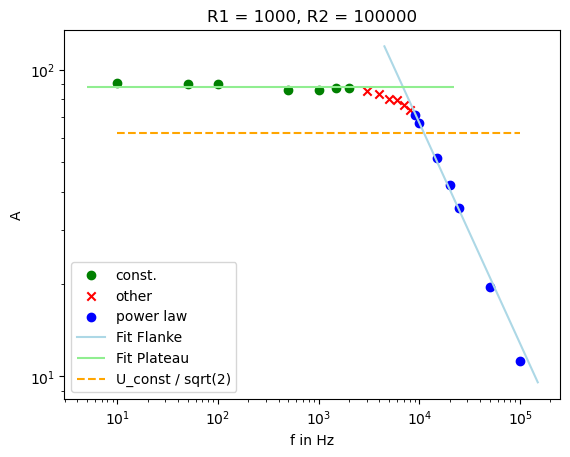

In [22]:
# data
f_inv, U_inv = np.genfromtxt("data/Invamp1.txt", unpack=True) # Hz, V
R1 = 1000
R2 = 100000
U_in_inv = 107e-3 # V
c1 = 7
c2 = 13

plot1(f_inv, U_inv, R1, R2, U_in_inv, c1, c2)

a = 33.1 +- 11.5, b = -0.132 +- 0.0347
Plateau = 11.2 +- 0.0
f_cutoff =  (0.5+/-1.9)e+05
A_theo =  10.0
Deviation ampl =  0.12149532710280368+/-0


/home/aarsch/miniforge3/envs/toolbox/lib/python3.13/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/tmp/ipykernel_43365/3247977158.py:69: FutureWarning: AffineScalarFunc.__abs__() is deprecated. It will be removed in a future release.
  dev_amplification = np.abs(theoretical_amplification - plateau_u)/theoretical_amplification


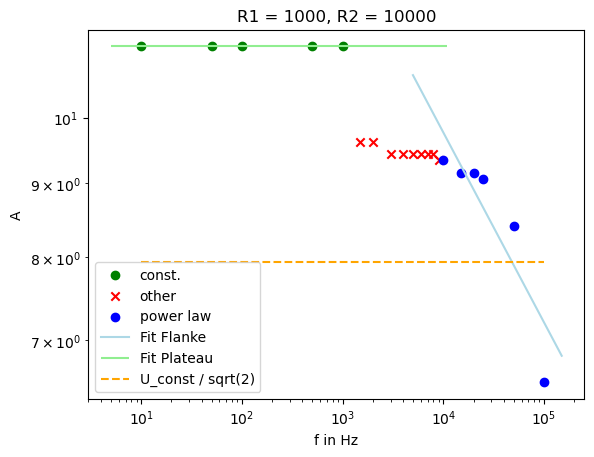

In [23]:
f_inv, U_inv = np.genfromtxt("data/Invamp2.txt", unpack=True) # Hz, V
R1 = 1000
R2 = 10000
U_in_inv = 107e-3 # V
c1 = 5
c2 = -6

plot1(f_inv, U_inv, R1, R2, U_in_inv, c1, c2)

a = 4.85e+04 +- 1.06e+04, b = -0.72 +- 0.0233
Plateau = 1.06e+02 +- 0.44
f_cutoff =  (8.0+/-3.3)e+03
A_theo =  150.0
Deviation ampl =  0.2919+/-0.0029


/tmp/ipykernel_43365/3247977158.py:69: FutureWarning: AffineScalarFunc.__abs__() is deprecated. It will be removed in a future release.
  dev_amplification = np.abs(theoretical_amplification - plateau_u)/theoretical_amplification


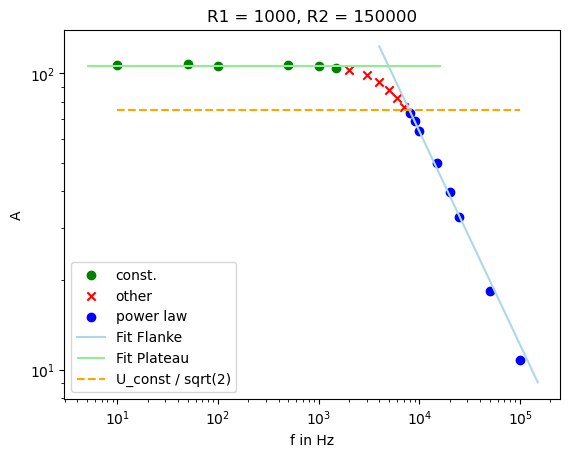

In [24]:
f_inv, U_inv = np.genfromtxt("data/Invamp3.txt", unpack=True) # Hz, V
R1 = 1000
R2 = 150000
U_in_inv = 40e-3 # V
c1 = 6
c2 = -8

plot1(f_inv, U_inv, R1, R2, U_in_inv, c1, c2)

theoretische Zeitkonstante tau =  0.001
m = 8.06e+02 +- 17.0, b = 5.83 +- 0.685
Zeitkonstante im Fit tau =  0.001240+/-0.000026
deviation tau =  0.240+/-0.026


/tmp/ipykernel_43365/3938917379.py:31: FutureWarning: AffineScalarFunc.__abs__() is deprecated. It will be removed in a future release.
  dev_tau = np.abs(tau - tau_fit)/tau


Text(0, 0.5, 'A')

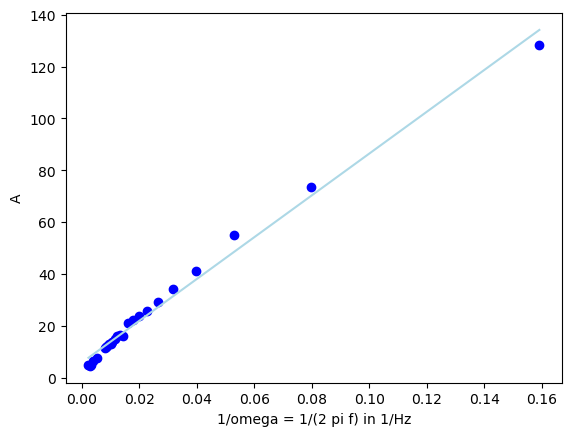

In [42]:
def lin(x, m, b):
    return m*x+b

f_int, U1, U2 = np.genfromtxt("data/IntegreatorAmp.txt", unpack=True)
U1 *= 1e-3
U_int = U2/U1

x = 1/(2*np.pi*f_int)

R = 10000
C = 100e-9
tau = R*C
print("theoretische Zeitkonstante tau = ", tau)

params, cov = curve_fit(lin, x, U_int)

m = params[0]
m_err = np.sqrt(np.diag(cov))[0]

b = params[1]
b_err = np.sqrt(np.diag(cov))[1]

m_u = ufloat(m, m_err)
b_u = ufloat(b, b_err)

print(f"m = {m:.3} +- {m_err:.3}, b = {b:.3} +- {b_err:.3}")

tau_fit = 1/m_u
print("Zeitkonstante im Fit tau = ", tau_fit)

dev_tau = np.abs(tau - tau_fit)/tau
print("deviation tau = ", dev_tau)

int_x = np.linspace(x[0], x[-1])
plt.plot(int_x, lin(int_x, *params), color="lightblue", label="Fit")



plt.scatter(x, U_int, color="blue", label="Data")

#plt.xscale("log")
plt.xlabel("1/omega = 1/(2 pi f) in 1/Hz")

#plt.yscale("log")
plt.ylabel("A")


theoretische Zeitkonstante tau =  0.0021999999999999997
m = 0.00185 +- 1.62e-05, b = 0.139 +- 0.0147
Zeitkonstante im Fit tau =  0.001850+/-0.000016
deviation tau =  0.159+/-0.007


/tmp/ipykernel_43365/307177080.py:28: FutureWarning: AffineScalarFunc.__abs__() is deprecated. It will be removed in a future release.
  dev_tau = np.abs(tau - tau_fit)/tau


Text(0, 0.5, 'A')

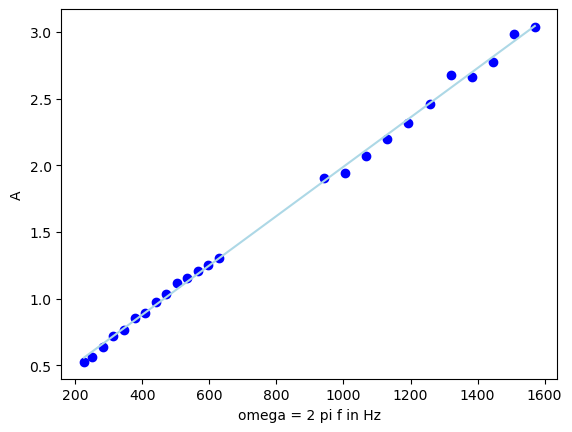

In [45]:
f_int, U2 = np.genfromtxt("data/differentiator.txt", unpack=True)
U1 = 3.14
U_int = U2/U1

x = 2*np.pi*f_int

R = 100000
C = 22e-9
tau = R*C
print("theoretische Zeitkonstante tau = ", tau)

params, cov = curve_fit(lin, x, U_int)

m = params[0]
m_err = np.sqrt(np.diag(cov))[0]

b = params[1]
b_err = np.sqrt(np.diag(cov))[1]

m_u = ufloat(m, m_err)
b_u = ufloat(b, b_err)

print(f"m = {m:.3} +- {m_err:.3}, b = {b:.3} +- {b_err:.3}")

tau_fit = m_u
print("Zeitkonstante im Fit tau = ", tau_fit)

dev_tau = np.abs(tau - tau_fit)/tau
print("deviation tau = ", dev_tau)

int_x = np.linspace(x[0], x[-1])
plt.plot(int_x, lin(int_x, *params), color="lightblue", label="Fit")



plt.scatter(x, U_int, color="blue", label="Data")

#plt.xscale("log")
plt.xlabel("omega = 2 pi f in Hz")

#plt.yscale("log")
plt.ylabel("A")

In [53]:
# Schmitt Trigger
R1 = 10000
R2 = 100000
U_s = ufloat(28.1, 0.1)
U_pm = R1/R2 * U_s
print(U_pm)

2.810+/-0.010
